### Exercise 07
### The Boltzmann distribution

#### 8.1 Microstates in a 5-level system

In [1]:
import scipy.special
import numpy as np
import random
import matplotlib.pyplot as plt

1. Write a Python-script that generates a series of configurations according to this scheme. In the initial state all particles should be in the second lowest energy level. We do 50000 simulation steps with 50 steps for equilibration.

In [2]:
N = 6
c = np.ones(N)
seconds = 50050
total_energy = [N]

e0, e1, e2, e3, e4 = [0], [N], [0], [0], [0]


for x in range(seconds):
    
    i = random.randint(0, c.size-1)
    j = random.randint(0, c.size-1)
    while c[i] == 4 or c[j] == 0:
        i = random.randint(0, c.size-1)
        j = random.randint(0, c.size-1)
    
    if i != j:
        if c[i]<4 and c[j]>0:
            c[i] += 1
            c[j] -= 1
    
    total_energy.append(np.sum(c))
    
    e0.append(c.size-np.count_nonzero(c))
    e1.append(np.count_nonzero(c == 1))
    e2.append(np.count_nonzero(c == 2))
    e3.append(np.count_nonzero(c == 3))
    e4.append(np.count_nonzero(c == 4))

2. Plot the total energy of the system as a function of time

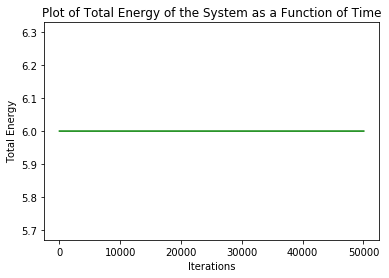

In [3]:
plt.plot(total_energy, color="g")
plt.xlabel("Iterations")
plt.ylabel("Total Energy")
plt.title("Plot of Total Energy of the System as a Function of Time")
plt.show()

3. Plot the population of the energy levels as function of time

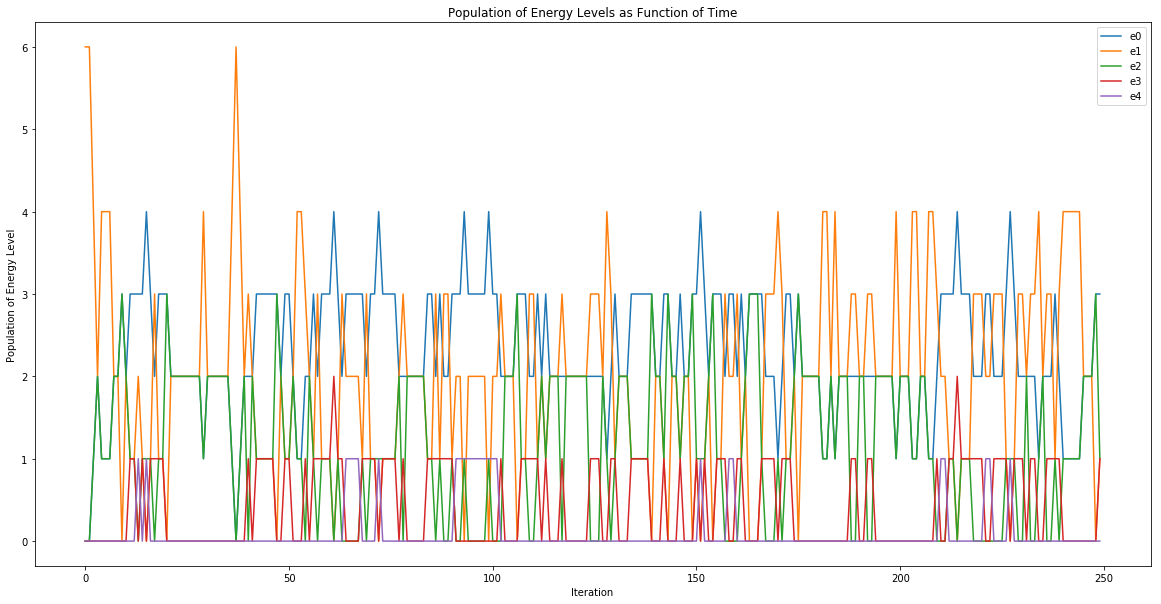

In [4]:
fig = plt.figure(figsize=(20, 10))
highest_time_to_plot = 250
plt.plot(e0[:highest_time_to_plot], label = 'e0')
plt.plot(e1[:highest_time_to_plot],label = 'e1')
plt.plot(e2[:highest_time_to_plot],label = 'e2')
plt.plot(e3[:highest_time_to_plot],label = 'e3')
plt.plot(e4[:highest_time_to_plot],label = 'e4')
plt.title('Population of Energy Levels as Function of Time')
plt.xlabel('Iteration')
plt.ylabel('Population of Energy Level')
plt.legend()

plt.show()

4. Calculate the average population of each energy level and the standard deviation after the equilibration period and plot the results with errorbars. We use a 50 timestep equilibration period.

In [5]:
system = np.asarray([e0, e1, e2, e3 ,e4]).T # [Timestep, Particle]
system = system[50:] # [Timestep, Particle]
print(system.shape)
avg = np.mean(system, axis=0)
std = np.std(system, axis=0)

(50001, 5)


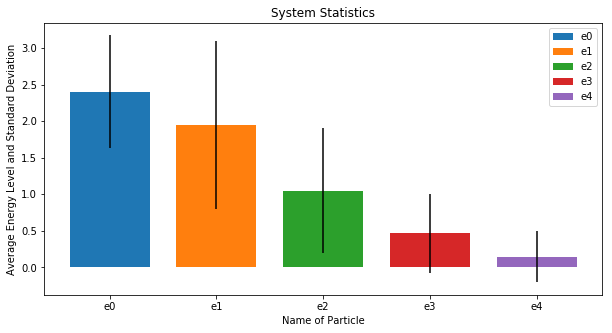

In [6]:
names = ['e0', 'e1', 'e2', 'e3', 'e4']
ind = np.arange(len(names))
width = 0.75

fig, ax = plt.subplots(figsize=(10,5))
for i, a, s, e in zip(ind, avg, std, names):
    r1 = ax.bar(i, a, width, 
                yerr=s, 
                label=e)

ax.set_ylabel('Average Energy Level and Standard Deviation')
ax.set_xlabel('Name of Particle')
ax.set_title('System Statistics')
ax.set_xticks(ind)
ax.set_xticklabels(names)
ax.legend()

5. Assuming that this system is Boltzmann, we estimate $\beta$. We do a linear fit to the log of our averages. A better analysis would include our uncertainty about each average.

\begin{equation}
    p_{i} \propto \exp{-\beta \epsilon_{i}}
\end{equation}

In [7]:
x = np.arange(len(avg))
y = scipy.special.softmax(avg)
_, m_beta = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
beta = -m_beta
print(x, y, sum(y))

[0 1 2 3 4] [0.46738719 0.29607332 0.12039104 0.0673644  0.04878404] 0.9999999999999999


In [8]:
print(f"Out reported beta is: {beta}")

Out reported beta is: 0.7282352139093905
